# Tutorial 5:Mouse_Brain_Merge_Anterior_Posterior(Section1,2)

## Environment Configuration & Package Loading

In [1]:
import os
import torch
import scanpy as sc

In [2]:
from GenOT import genot

In [3]:
# Run device, by default, the package is implemented on 'cpu'. We recommend using GPU.
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# the location of R, which is necessary for mclust algorithm. Please replace the path below with local R installation path
os.environ['R_HOME'] = 'C:/Program Files/R/R-4.4.1'
os.environ['PATH'] = 'C:/Program Files/R/R-4.4.1/bin/x64;' + os.environ['PATH']

## Data Loading

In [4]:

# read data
adata1 = sc.read_h5ad(r"..\Data\Mouse_Brain_Merge_Anterior_Posterior_Section_1.h5ad")
adata2 = sc.read_h5ad(r"..\Data\Mouse_Brain_Merge_Anterior_Posterior_Section_2.h5ad")

In [5]:
from GenOT.utils import find_hvg_somde

hvg_gene_names1 = find_hvg_somde(
    adata1,
    save_output=False,  #save txt
)
hvg_gene_names2 = find_hvg_somde(
    adata2,
    save_output=False,  #save txt
)

adata1 = adata1[:, hvg_gene_names1].copy()
adata2 = adata2[:, hvg_gene_names2].copy()



using 17*17 SOM nodes for 6050 points
norm mtx first


Models: 100%|██████████| 10/10 [07:41<00:00, 46.13s/it][A


using 17*17 SOM nodes for 6114 points
norm mtx first


Models: 100%|██████████| 10/10 [07:36<00:00, 45.64s/it][A


## Run GenOT

In [6]:
# define model
encoder1 = genot.Encoder(adata1, epochs=1500, pca_n=200, device=device)
encoder2 = genot.Encoder(adata2, epochs=1500, pca_n=100, device=device)
# run model
adata1 = encoder1.train_encoder()
adata2 = encoder2.train_encoder()

Begin to train ...


100%|██████████| 1500/1500 [00:22<00:00, 67.18it/s]


 finished!
Begin to train ...


100%|██████████| 1500/1500 [00:21<00:00, 68.58it/s]


 finished!


## Spatial Domain Identification (mclust)

In [7]:
from GenOT.utils import clustering

tool = 'mclust'

n_clusters = 29
# clustering
clustering(adata1, n_clusters, method=tool)
clustering(adata2, n_clusters, method=tool)

   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
fitting ...
  |======================================================================| 100%


## Visualization

[<AxesSubplot: title={'center': 'Mouse_Brain_Merge_Anterior_Posterior_Section_1'}, xlabel='spatial1', ylabel='spatial2'>]

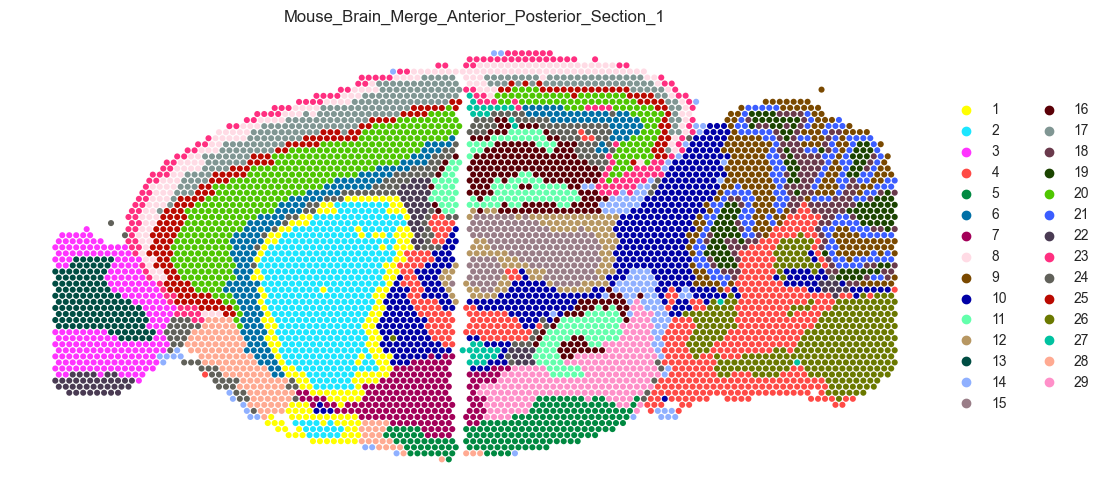

In [8]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)

sc.pl.spatial(
    adata1, img_key=None, color='domain', title="Mouse_Brain_Merge_Anterior_Posterior_Section_1",
    show=False, frameon=False, spot_size=120,
)


[<AxesSubplot: title={'center': 'Mouse_Brain_Merge_Anterior_Posterior_Section_2'}, xlabel='spatial1', ylabel='spatial2'>]

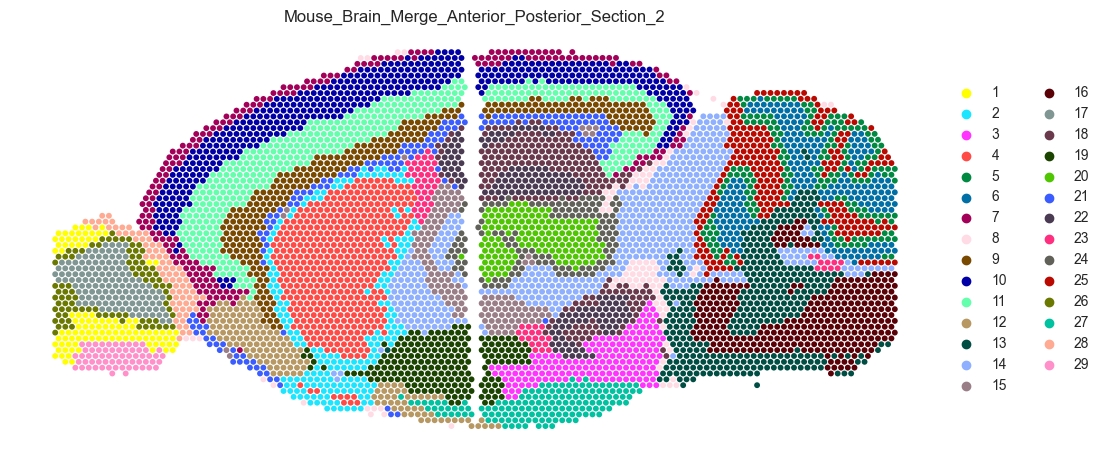

In [9]:
plt.rcParams["figure.figsize"] = (12, 6)
sc.pl.spatial(
    adata2, img_key=None, color='domain', title="Mouse_Brain_Merge_Anterior_Posterior_Section_2",
    show=False, frameon=False, spot_size=120,
)